# Red Wine quality prediction
- data set on kaggle: https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

In [135]:
#General imports
from IPython.display import Markdown as md
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 1. Introduction
## 1.1 Data to Pandas Dataframe



In [136]:
# Mapping to pandas Framework
redwine = pd.read_csv('winequality-red.csv')

## 1.2 Description of data
- Input variables:
    1. fixed acidity
    2. volatile acidity
    3. citric acid
    4. residual sugar
    5. chlorides
    6. free sulfur dioxide
    7. total sulfur dioxide
    8. density
    9. pH
    10. sulphates
    11. alcohol

- Output variable:
    1. quality (score between 0 and 10) 

## 1.3 Exploration of the data

In [137]:
redwine.head(n=20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [138]:
shape = redwine.shape
md("The data consists of {} data-points and {} features".format(shape[0],shape[1]))


The data consists of 1599 data-points and 12 features

In [139]:
redwine.mean()

fixed acidity            8.319637
volatile acidity         0.527821
citric acid              0.270976
residual sugar           2.538806
chlorides                0.087467
free sulfur dioxide     15.874922
total sulfur dioxide    46.467792
density                  0.996747
pH                       3.311113
sulphates                0.658149
alcohol                 10.422983
quality                  5.636023
dtype: float64

# 2. Cleaning dataset
- remove possible null values

In [140]:
redwine.isnull().isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# 3 Investigation of the data

In [141]:
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
columns = list(redwine)

## 3.1 Outliers


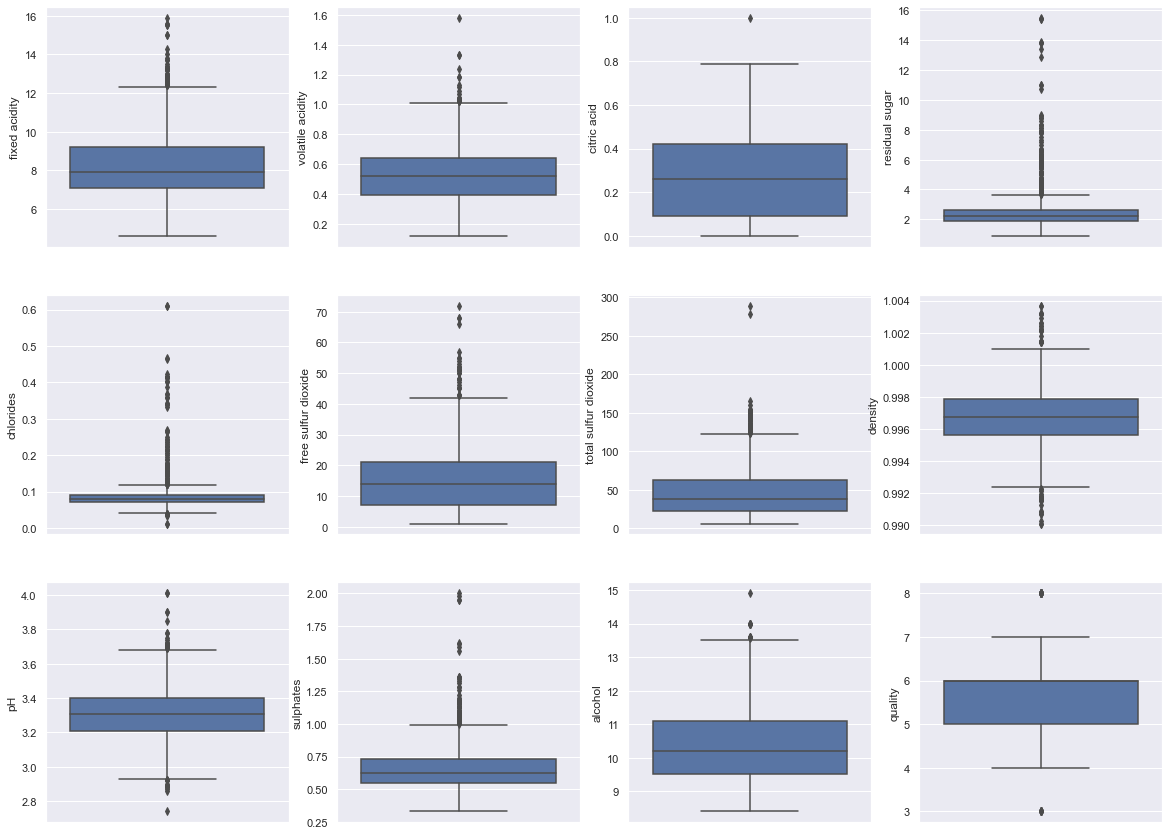

In [142]:
sns.set()
fig = plt.figure(figsize = [20,15])

i = 1
for col in columns :
    plt.subplot(3,4,i)
    sns.boxplot(data = redwine, y = col)
    i+=1
    
plt.savefig(os.path.join('outputs', 'outliers.png'))
plt.show()  

## 3.2 Distribution of quality

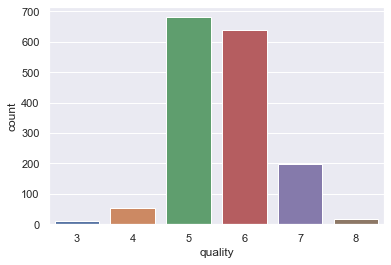

In [143]:
sns.countplot(data = redwine, x = 'quality')

plt.savefig(os.path.join('outputs', 'target_distribution.png'))
plt.show()

In [144]:
redwine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## 3.3 Correlation between features

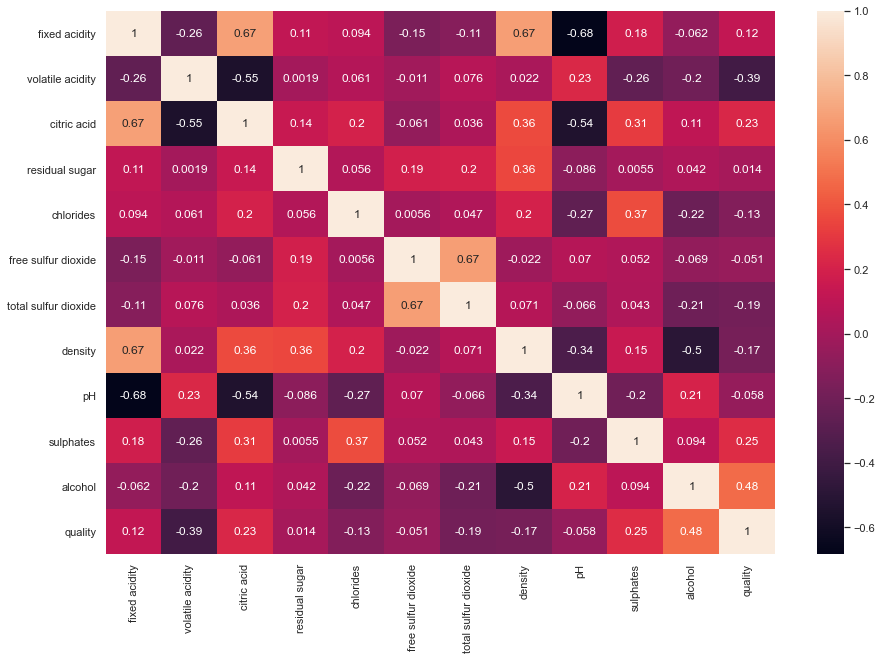

In [145]:
fig = plt.figure(figsize = [15,10])
sns.heatmap(redwine.corr(),annot = True)
plt.savefig(os.path.join('outputs', 'correlation_features.png'))
plt.show()

# 4. Splitting data into training and testing set
## 4.1 Preparation

In [146]:
# Renaming columns  (Abstraction meaning of features)
redwine = redwine.rename(columns={'fixed acidity': 'fa', 'volatile acidity': 'va', 'citric acid': 'ca', 'residual sugar': "rs", 'chlorides':"c",'free sulfur dioxide':'fsd','total sulfur dioxide':'tsd','density': 'd','sulphates':'s','alcohol':'a','quality':'q'})
redwine.head()

,fa,va,ca,rs,c,fsd,tsd,d,pH,s,a,q
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [147]:
# Selection of feautures and targt
features = ['fa','va','ca','rs','c','fsd','tsd','d','pH','s','s']
target = ['q']

## 4.2 Actual splitting

In [148]:
import sklearn
from sklearn.model_selection import train_test_split

In [149]:
size_of_test_data = 0.10

X_raw = redwine[features]
y_raw = redwine[target]

X_train, X_test, y_train, y_test = train_test_split(X_raw,y_raw,random_state = 42, test_size=size_of_test_data)

md("The test data consists of {}% of the whole dataset, leaving {}% for training".format(size_of_test_data*100, (1-size_of_test_data)*100))

The test data consists of 10.0% of the whole dataset, leaving 90.0% for training

# 5. Regression with Scikit-learn
## 5.1 General Code
### 5.1.1 Evaluation code

In [150]:
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
def eval_reg(y_test,predicted):
    print('Mean Absolute Error:\t', mean_absolute_error(y_test, predicted))
    print('Mean Squared Error:\t', mean_squared_error(y_test, predicted))
    print('R^2 Score:\t',r2_score(y_test, predicted))

In [151]:
def comp_pred(y_test,predicted):
     print("\n Compare predictions with y_test:")
     print("predicted",predicted[10:30])
     print("y_test",y_test[10:30])

In [152]:
def comp_graph(y_test,predicted,model_name):
    plt.title('Comparison of Y values in test and the Predicted values')
    plt.ylabel('Red Wine Set')
    plt.xlabel('Predicted values')
    plt.scatter(predicted, y_test,  color='black')
    plt.savefig(os.path.join('outputs', model_name+'_compare.png'))
    plt.show()

### 5.1.2 Model code

In [153]:
import math
def do_model(model,model_name):
    #Fitting model
    fit = model.fit(X_train, y_train)
    #Scoring of train data
    train_score = model.score(X_train, y_train)
    #Scoring of test data
    test_score = model.score(X_test, y_test)
    #Prediction
    predicted = model.predict(X_test)

    #Evaluation of prediction
    eval_reg(y_test,predicted)
    comp_pred(y_test,predicted)
    comp_graph(y_test,predicted,model_name)

    #Print scoring
    print("train_score:\t",train_score)
    print("test_score:\t",test_score)

## 5.1 Linear Regression

Mean Absolute Error:	 0.5022653257683881
Mean Squared Error:	 0.4139567722514238
R^2 Score:	 0.3795132402578342

 Compare predictions with y_test:
predicted [[5.83835686]
 [5.42953951]
 [5.6705383 ]
 [5.37856372]
 [5.68869156]
 [6.47195923]
 [5.1068315 ]
 [5.62747419]
 [6.45423401]
 [5.45651929]
 [5.3577513 ]
 [5.38947749]
 [5.93318937]
 [6.12061257]
 [5.48375995]
 [5.58501988]
 [6.0095925 ]
 [5.45007415]
 [5.36912777]
 [6.50211416]]
y_test       q
513   7
1505  3
1525  5
1568  5
220   6
1010  7
30    5
942   7
481   8
135   5
65    5
99    6
1547  5
1311  6
29    6
745   6
538   7
168   6
274   5
271   6


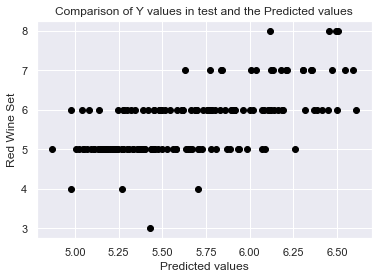

train_score:	 0.3088987095243787
test_score:	 0.3795132402578342


In [154]:
from sklearn.linear_model import LinearRegression
do_model(LinearRegression(),'LinearRegression')

## 5.2 Decision Tree: Fit a new regression model to the traing set

Mean Absolute Error:	 0.40625
Mean Squared Error:	 0.53125
R^2 Score:	 0.20370045084606836

 Compare predictions with y_test:
predicted [7. 5. 6. 5. 5. 6. 5. 5. 6. 5. 5. 6. 5. 6. 6. 6. 7. 6. 5. 6.]
y_test       q
513   7
1505  3
1525  5
1568  5
220   6
1010  7
30    5
942   7
481   8
135   5
65    5
99    6
1547  5
1311  6
29    6
745   6
538   7
168   6
274   5
271   6


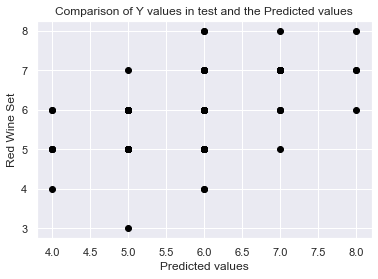

train_score:	 1.0
test_score:	 0.20370045084606836


In [156]:
from sklearn.tree import DecisionTreeRegressor
do_model(DecisionTreeRegressor(max_depth=35),'LinearRegression')